## Part 5: A non-linear Gaussian model

Consider the following probabilistic model:

$$
y \mid w \sim \mathcal{N}(e^w,\, 1), \\
w \sim \mathcal{N}(0,\, 1)
$$

for a single observation $ y \in \mathbb{R} $ and parameter $ w \in \mathbb{R} $.  
The mode of the posterior distribution is

$$
\hat{w}_{\text{MAP}} = \arg \max_w \; p(w \mid y) \approx 1.293404
$$

for $ y = 5 $.

---

### Question 5.1
Use ancestral sampling with $ S = 1000 $ to estimate the **prior mean of** $ y $.

---

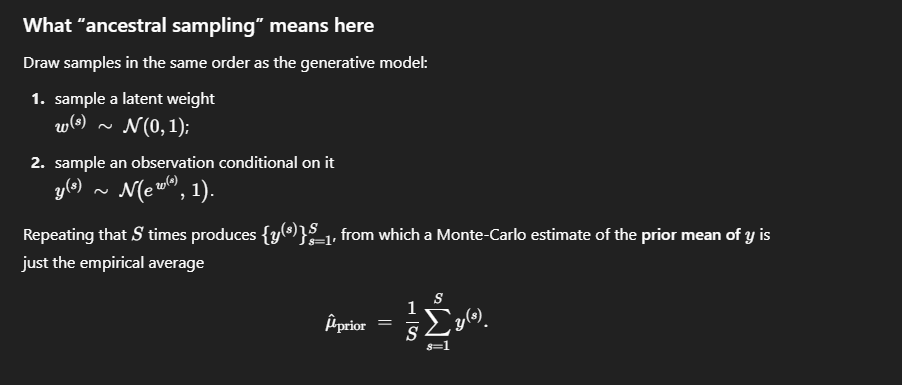

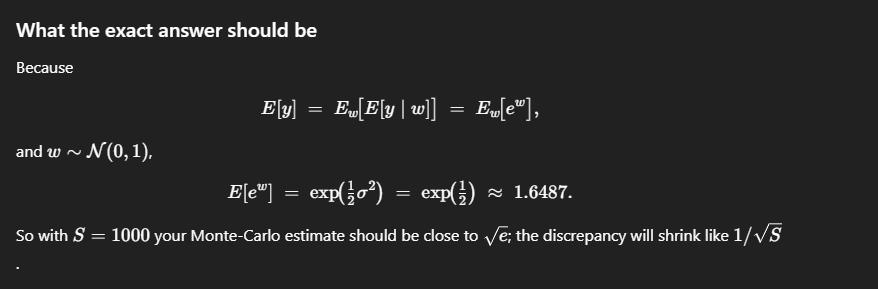

In [8]:
import numpy as np

np.random.seed(0)  # Set the random seed for reproducibility so results are the same each run

S = 1000  # Number of samples to draw for ancestral sampling

# Step 1: Sample w from its prior distribution, which is a standard normal N(0, 1)
# This means we draw S samples from a normal distribution with mean 0 and variance 1
w = np.random.normal(0, 1, size=S)

# Step 2: For each sampled w, sample y from its conditional distribution
# The conditional distribution is y | w ~ N(exp(w), 1)
# np.exp(w) computes the mean for each y sample, so each y is drawn from N(mean=exp(w_i), variance=1)
y = np.random.normal(np.exp(w), 1, size=S)

# Compute the Monte Carlo estimate of the prior mean of y
# This is the average of all y samples, which approximates E[y] under the prior
prior_mean_estimate = y.mean()

# Print the estimated prior mean of y with 3 decimal places
print(f"Monte-Carlo estimate of E[y] ≈ {prior_mean_estimate:.3f}")


Monte-Carlo estimate of E[y] ≈ 1.570


In [9]:
np.random.seed(0)  # Set the random seed for reproducibility so results are the same each run

S = 1000  # Number of samples to draw for ancestral sampling

# Step 1: Sample w from its prior distribution, which is a standard normal N(0, 1)
w_samples = np.random.normal(0, 1, size=S)

# Step 2: For each sampled w, sample y from its conditional distribution
# The conditional distribution is y | w ~ N(exp(w), 1)
# np.exp(w_samples) computes the mean for each y sample
y_samples = np.random.normal(np.exp(w_samples), 1, size=S)

# Compute the Monte Carlo estimate of the prior mean of y
# This is the average of all y_samples
print(f'Prior mean of y = {np.mean(y_samples):3.2f}')

Prior mean of y = 1.57


### Question 5.2
Evaluate the **logarithm of the joint density** for  
$ w = \hat{w}_{\text{MAP}} $ and $ y = 5 $.

---

We have:

$$
\log p(y, w) = \log \mathcal{N}(y \mid e^w, 1) + \log \mathcal{N}(w \mid 0, 1)
$$

and thus the log joint for $ y = 5 $ and $ w = \hat{w}_{\text{MAP}} $ becomes

$$
\log p(5, w_{\text{MAP}}) 
= \log \mathcal{N}(5 \mid e^{w_{\text{MAP}}}, 1)
+ \log \mathcal{N}(w_{\text{MAP}} \mid 0, 1)
\approx -3.59
$$

(using $ \hat{w}_{\text{MAP}} \approx 1.293404 $)


In [11]:
# Define the log of the normal PDF:
# log N(x | m, v) = - (x - m)^2 / (2v) - 0.5 * log(2πv)
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)

# Model:
# Prior:      w ~ N(0, 1)         --> log p(w) = log N(w | 0, 1)
# Likelihood: y | w ~ N(exp(w),1) --> log p(y | w) = log N(y | exp(w), 1)
log_prior = lambda w: log_npdf(w, 0, 1)
log_lik = lambda w: log_npdf(5, np.exp(w), 1)

# Joint log-density: log p(y, w) = log p(w) + log p(y | w)
log_joint = lambda w: log_prior(w) + log_lik(w)

# MAP estimate for w (given in the question)
w_map = 1.293404

# Evaluate the log joint at w_map for y = 5
print(f'Log joint at w_map: {log_joint(w_map):3.2f}')

Log joint at w_map: -3.59


_______________
We will now introduce a **Laplace approximation** of the posterior, i.e.

$$
p(w \mid y) \approx q(w)
$$


### Question 5.3
Determine the **approximate posterior mean and variance** of the Laplace approximation $ q $  
for $ y = 5 $.

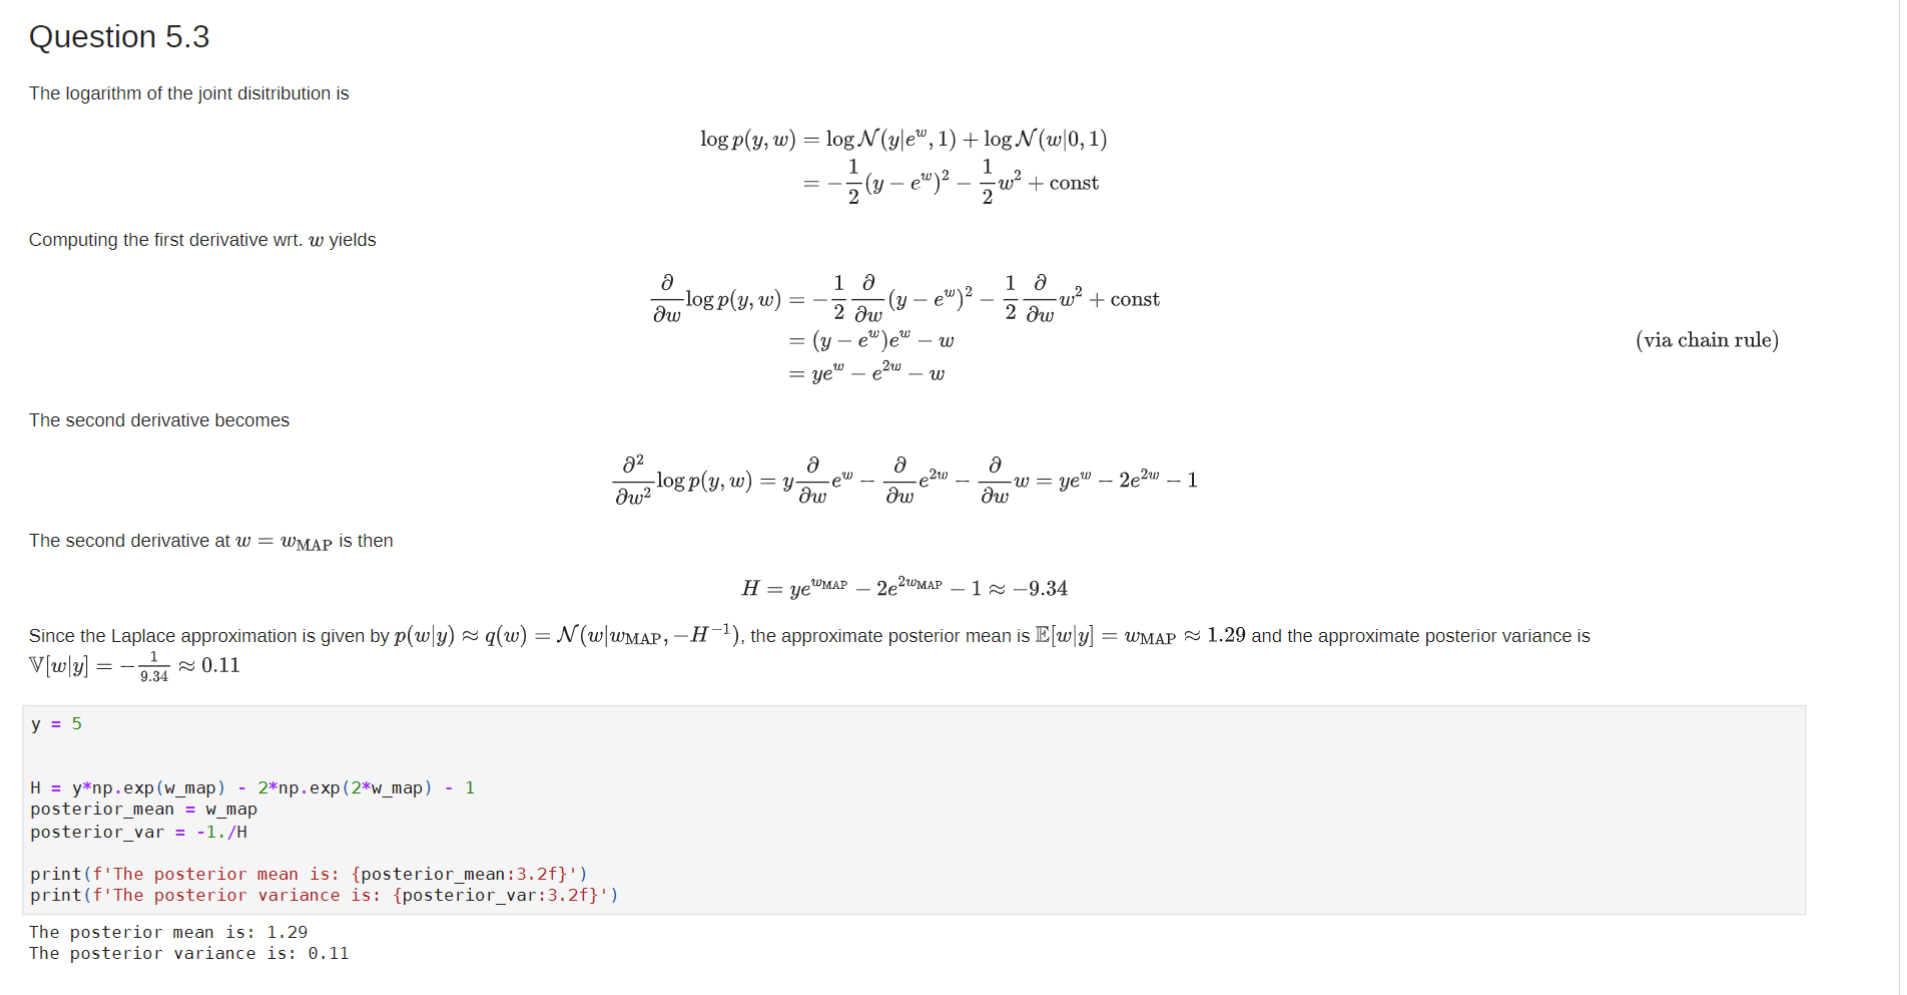

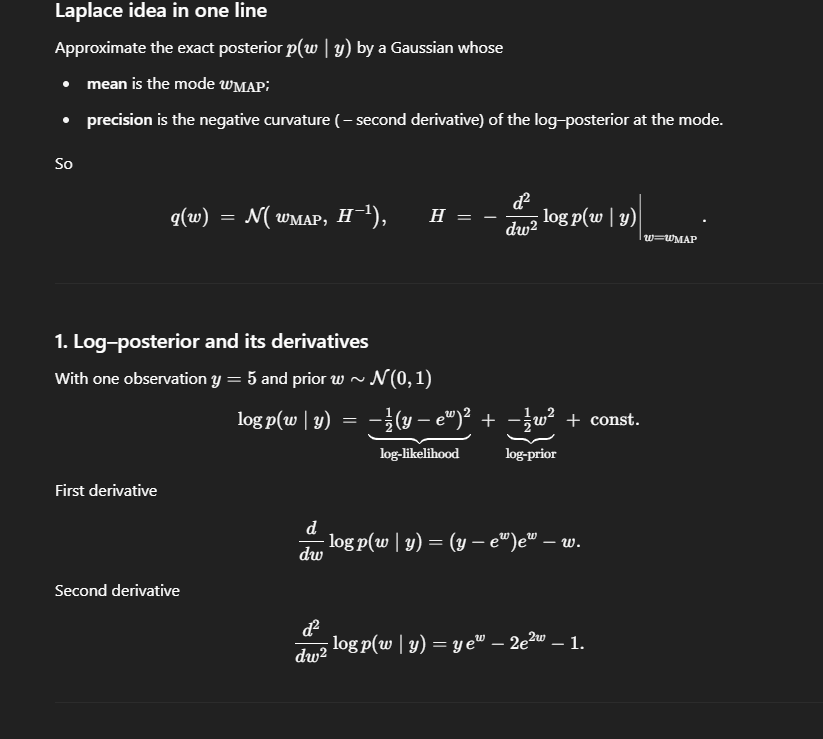

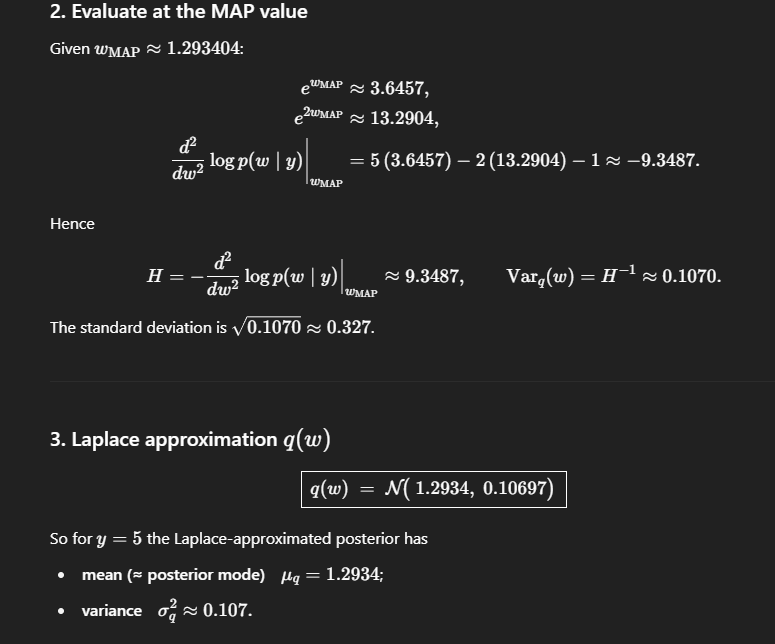


### Question 5.4
Use the Laplace approximation $ q $ to estimate the **posterior probability** of the event

$$
w > \hat{w}_{\text{MAP}} \quad \text{for} \quad y = 5.
$$

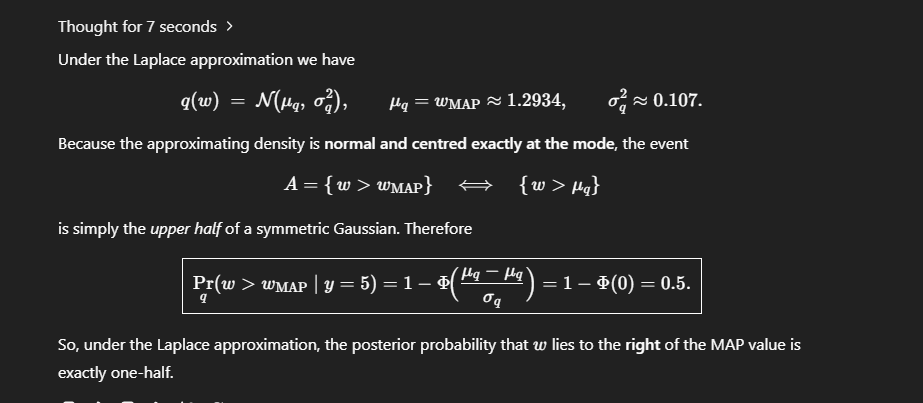